In [7]:
import numpy as np
# загрузка данных 
dataset = np.loadtxt('sample_1.txt') 
print(dataset)

[ 0.25580472  0.76222888  1.65694791  1.16472571  0.37196796  0.50221039
  1.32621082  1.02915795  0.60331224  1.78284807  0.33857602  0.8887261
  0.11974962  0.08894828  0.91842124  1.27042603  0.65065242  1.22032131
  0.93400951  1.43820422  0.99977348  0.06781646  0.56910448  2.08275902
  0.21047577  0.54922744  0.62234742  0.30895966  0.42204529  1.59797462
  2.15606921  0.27110493  0.50573259  0.26315826  0.36937113  0.24833092
  0.45078184  0.51707183  0.61771052  0.21487473  0.34013947  0.0699422
  2.54521605  0.35081291  1.05375851  0.44700703  0.50983747  0.95517679
  0.79446081  0.77058418  0.1540644   1.0579389   0.77190911  0.14612327
  1.5464392   0.20010022  0.32613123  0.80874104  0.28743452  0.19355289
  0.72987369  0.07984274  0.14403137  0.08252457  0.70349589  0.98277646
  0.7347897   0.32336381  0.01501663  0.45926028  1.48721271  1.47272896
  0.22079555  0.89494048  0.09098448  1.20636143  0.31217659  0.68088307
  1.1194456   0.26783426  0.58611423  1.4632034   0.4

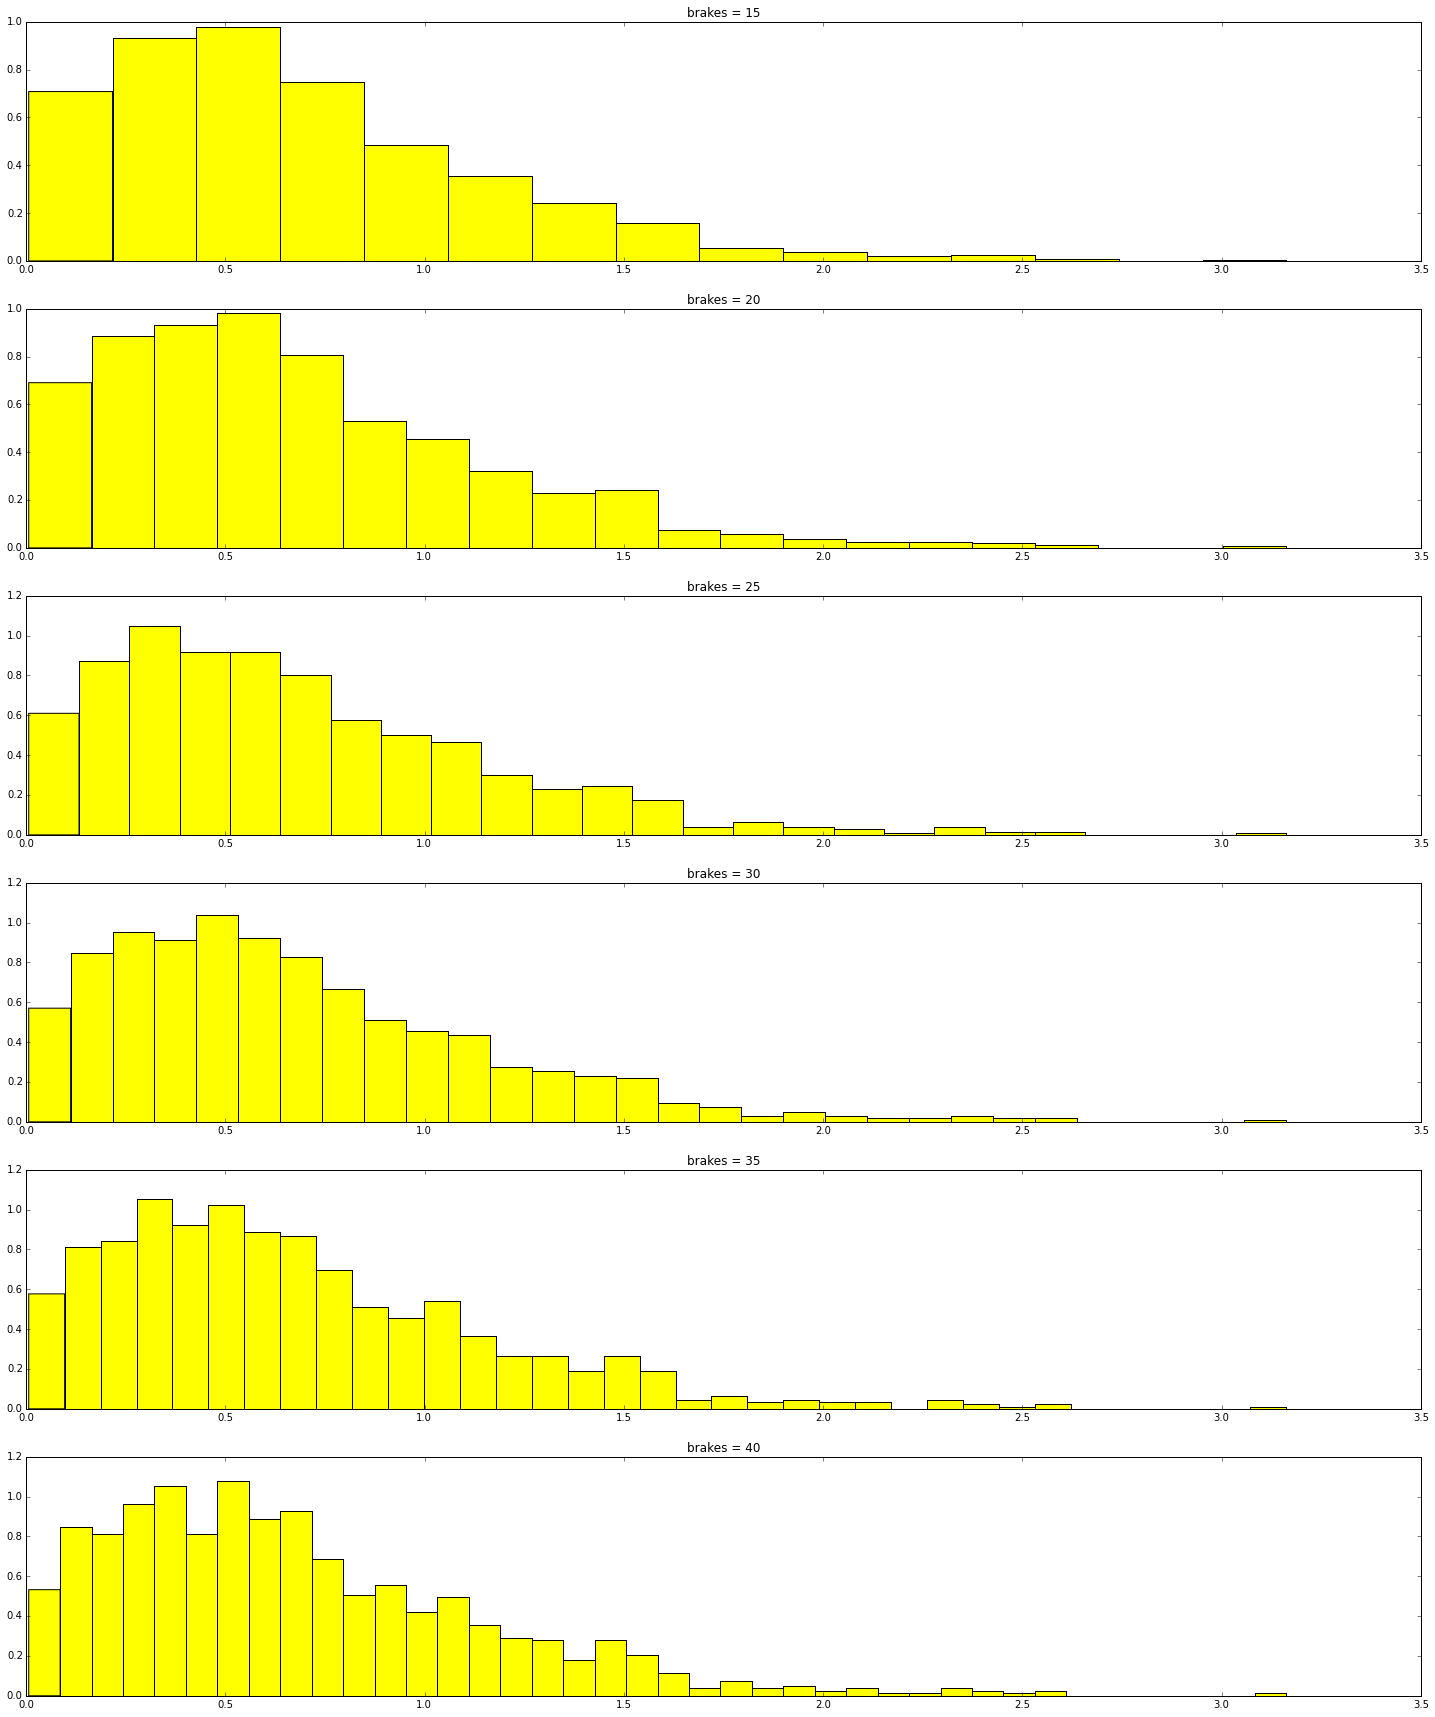

In [8]:
# гистограммы
%matplotlib inline

import matplotlib.pyplot as histogram

histogram.figure(figsize=(25, 30))
for i in range(1, 7):
    brakes = i*5 + 10
    histogram.subplot(6, 1, i)
    histogram.hist(dataset, fc='yellow', bins=brakes, normed=True)
    histogram.title('brakes = ' + str(brakes))
histogram.show()

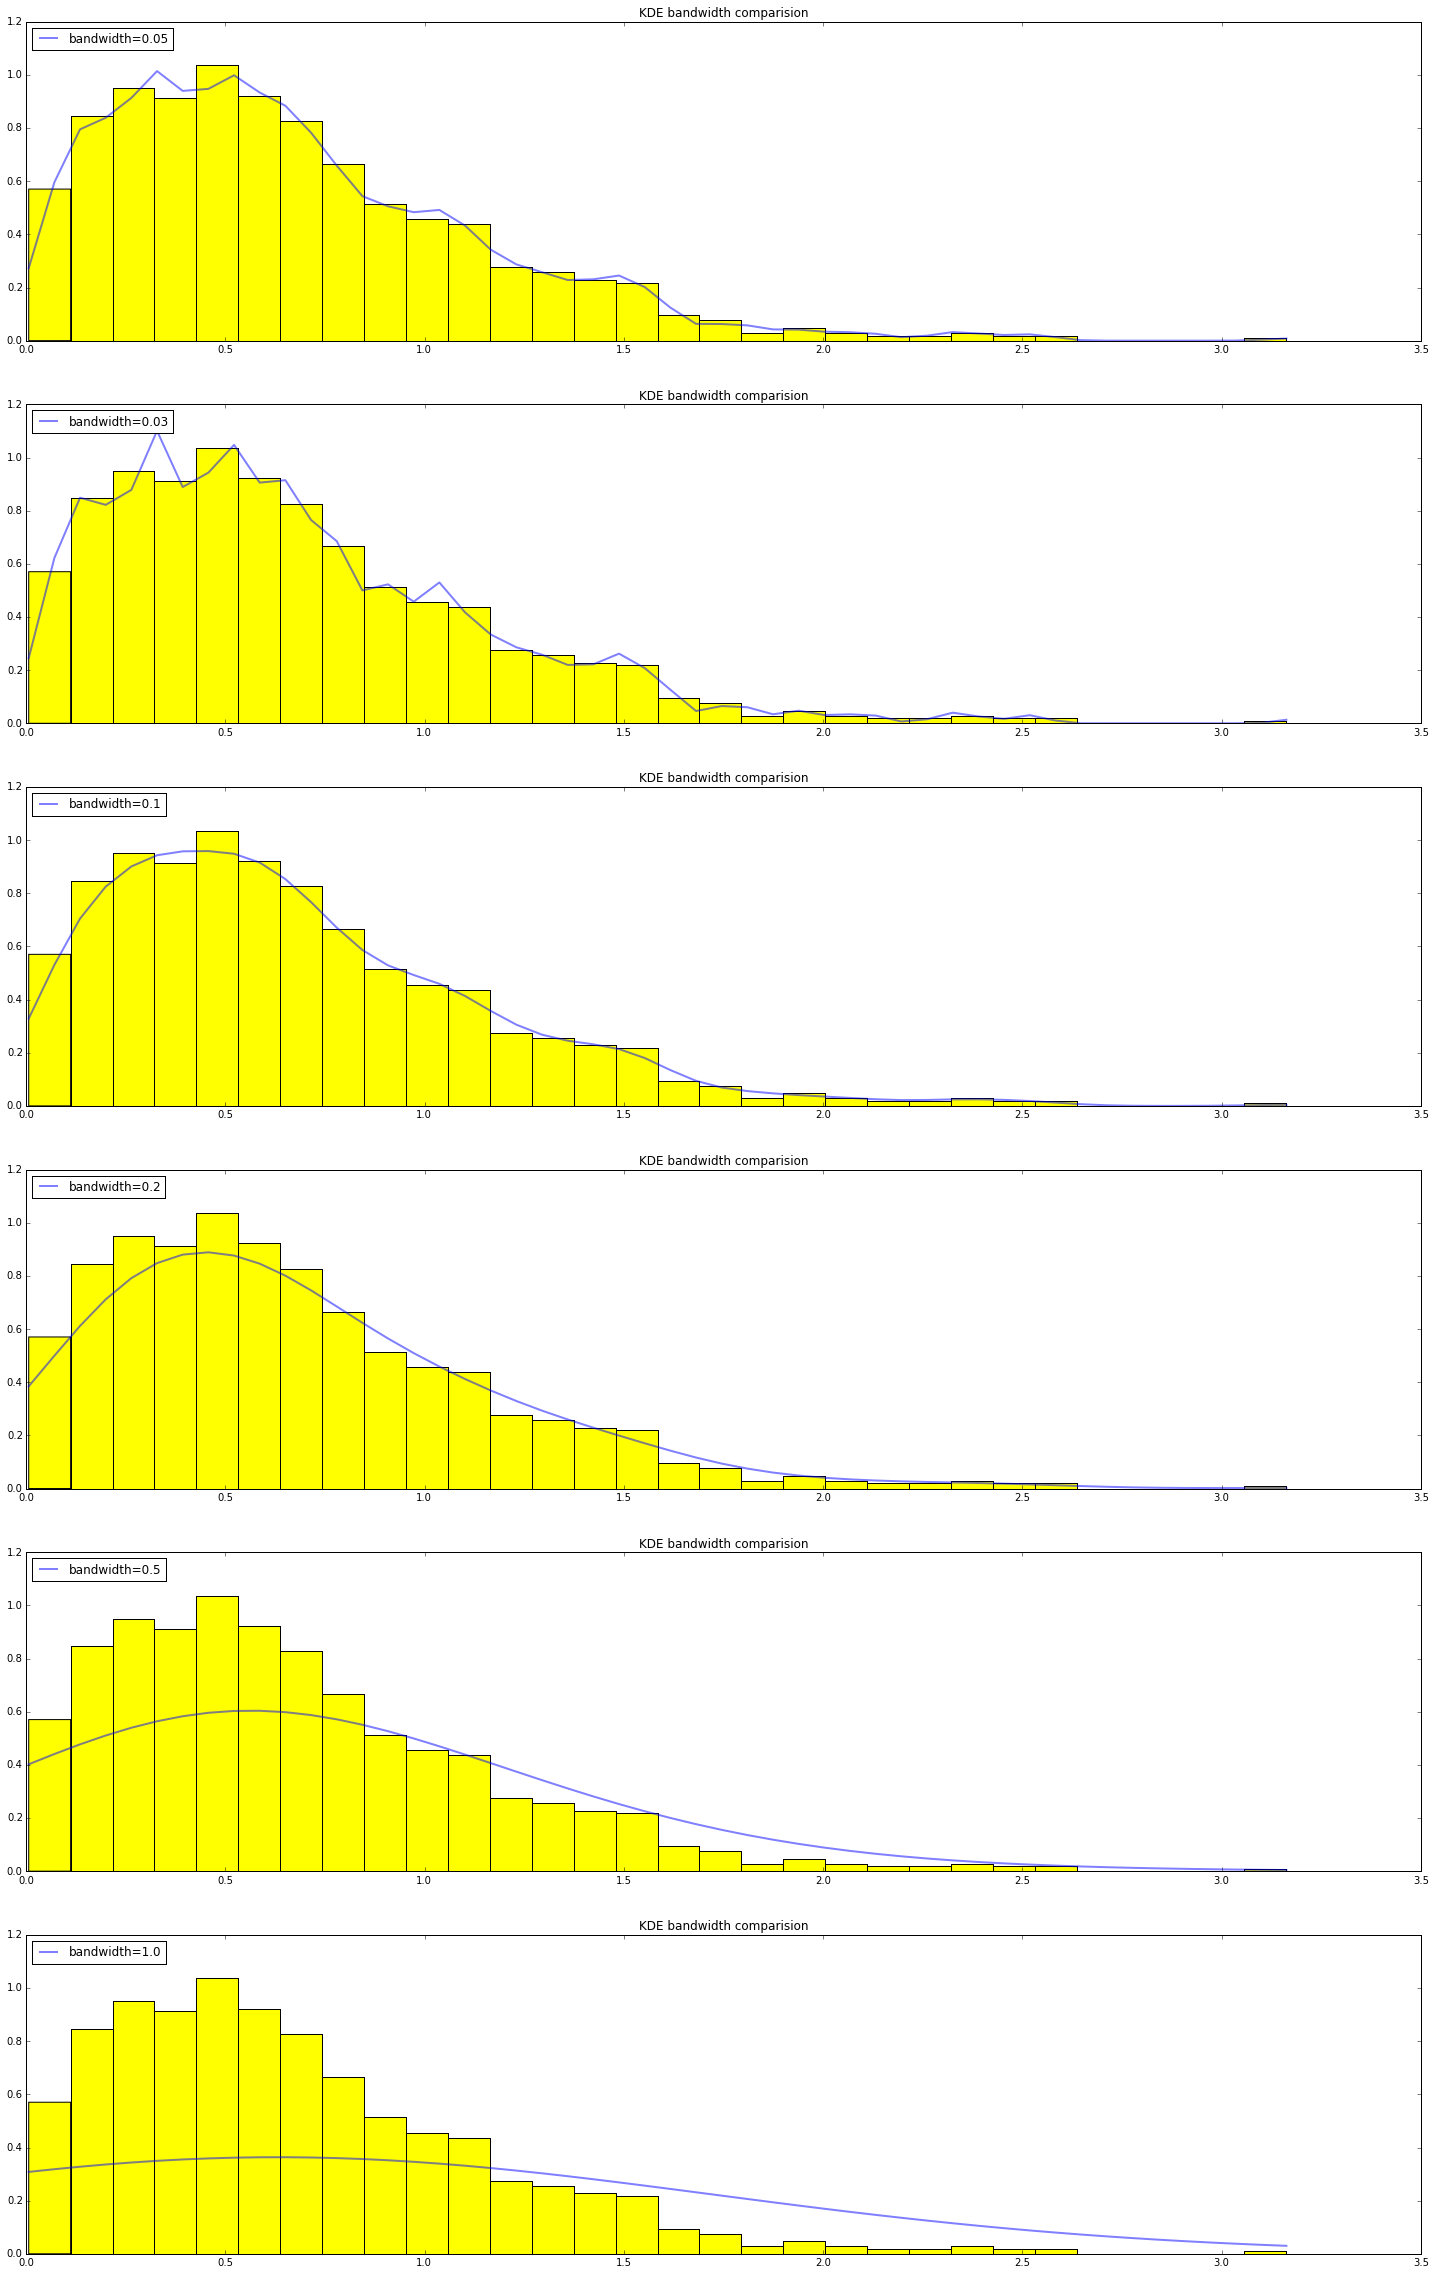

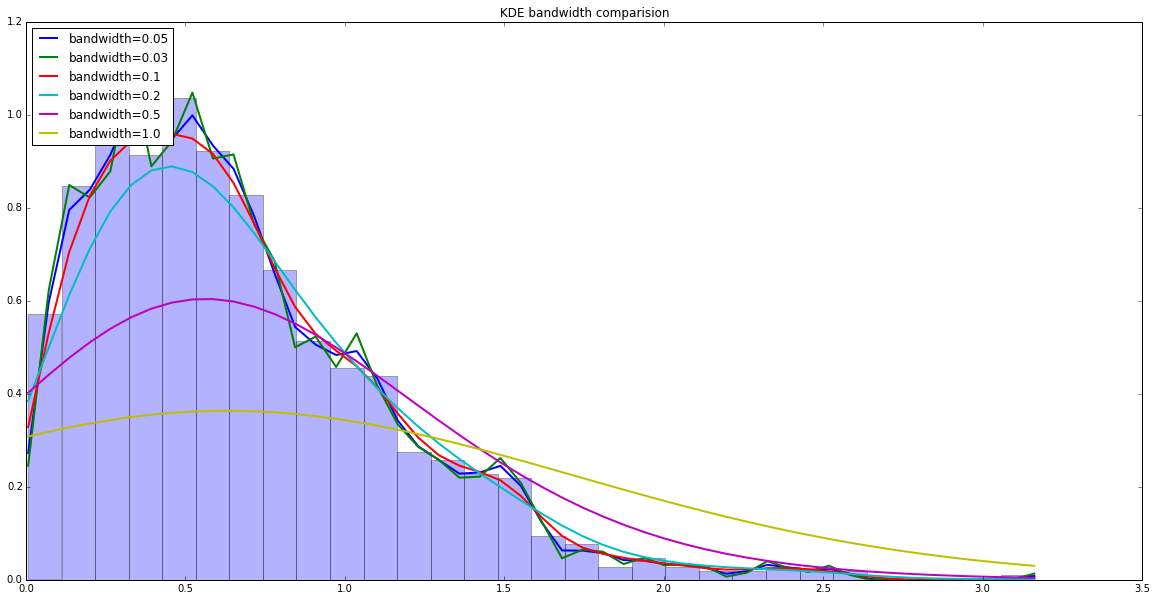

In [12]:

def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    from sklearn.neighbors import KernelDensity
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)


bandwidths = [0.05, 0.03, 0.1, 0.2, 0.5, 1.0]
x_grid = np.linspace(dataset.min(), dataset.max())

fig = histogram.figure(4, figsize=(25, 40))
i = 1
for bandwidth in bandwidths:
    histogram.subplot(6, 1, i)
    histogram.plot(x_grid, kde_sklearn(dataset, x_grid, bandwidth=bandwidth), 
                   label='bandwidth={0}'.format(bandwidth), linewidth=2, alpha=0.5)
    histogram.hist(dataset, 30, fc='yellow', normed=True)
    histogram.legend(loc='upper left')
    histogram.title('KDE bandwidth comparision')
    i += 1

histogram.show()

fig = histogram.figure(3, figsize=(20, 10))
ax = fig.add_subplot(111)


for bandwidth in bandwidths:
    ax.plot(x_grid, kde_sklearn(dataset, x_grid, bandwidth=bandwidth), 
            label='bandwidth={0}'.format(bandwidth), linewidth=2)
ax.hist(dataset, 30, fc='blue', alpha=0.3, normed=True)
ax.legend(loc='upper left')
histogram.title('KDE bandwidth comparision')
histogram.show()




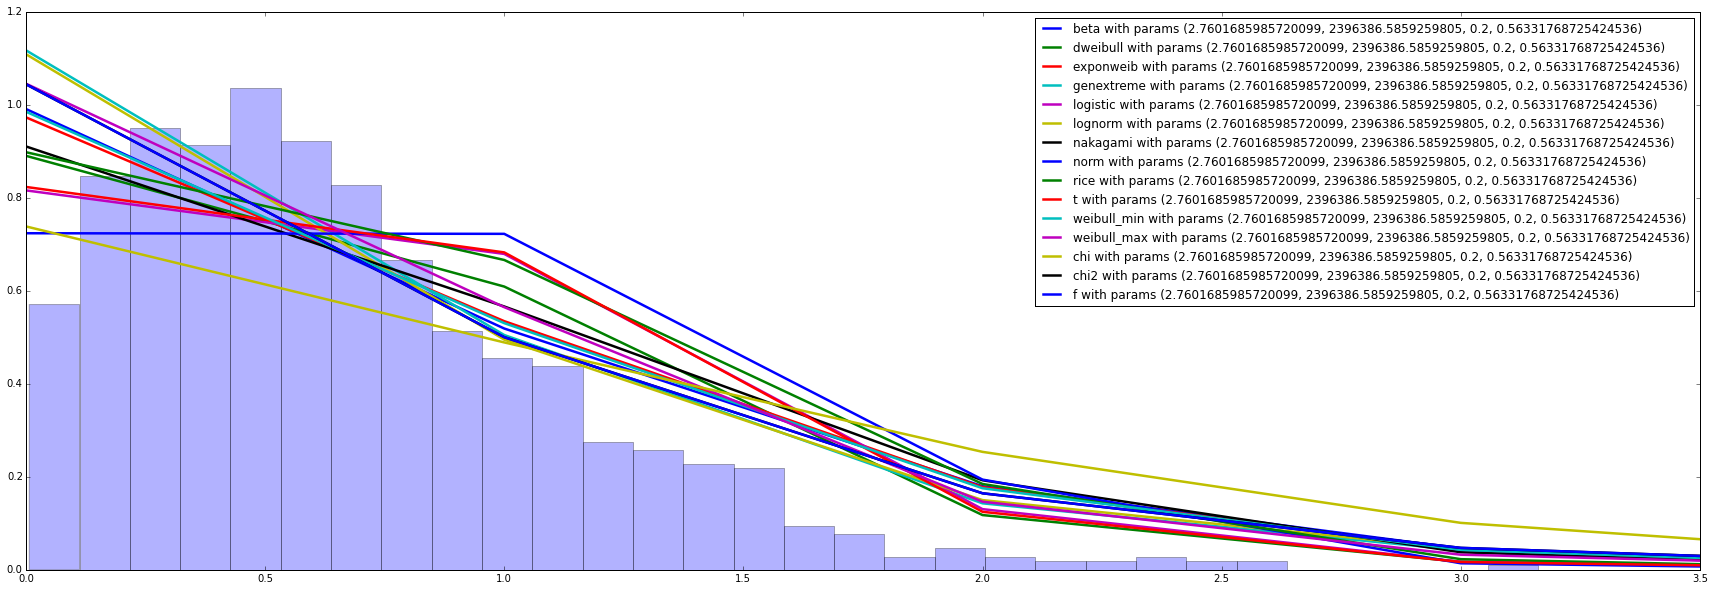

In [64]:
#distributions
import matplotlib.pyplot as plt
import scipy.stats

plt.figure(5, figsize=(30, 10))
h = plt.hist(dataset, bins=30, color='w', fc='blue',alpha=0.3, normed=True)

dist_names = ['beta', 'dweibull', 'exponweib', 'genextreme', 'logistic', 'lognorm', 'nakagami', 'norm', 
              'rice', 't', 'weibull_min', 'weibull_max', 
              'chi', 'chi2','f']


for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    p = dist.fit(dataset)
    pdf_fitted = dist.pdf(np.linspace(min(dataset)+0.4, max(dataset)+1, 8), *p)
    plt.plot(pdf_fitted, label="{} with params {}".format(dist_name, param), linewidth=2.5)
    plt.xlim(0,3.5)
    plt.legend(loc='upper right')
plt.show()


# import matplotlib.pyplot as plt
# import scipy.stats



# dist_names = ['t', 'lognorm', 'dweibull', 'genextreme']


# for dist_name in dist_names:
#     plt.figure(5, figsize=(30, 10))
#     plt.hist(dataset, bins=30, color='w', fc='yellow', alpha=0.3, normed=True)

#     dist = getattr(scipy.stats, dist_name)
#     param = dist.fit(dataset, floc = 0.2)
#     pdf_fitted = dist.pdf(np.linspace(min(dist)-0.024, max(dist)+0.0091, 100), param[0], param[1], param[2])
#     plt.plot(pdf_fitted, label="{} with params {}".format(dist_name, param), linewidth=2.5)
#     plt.xlim(0,3.5)
#     plt.legend(loc='upper center')
#     plt.show()

beta with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


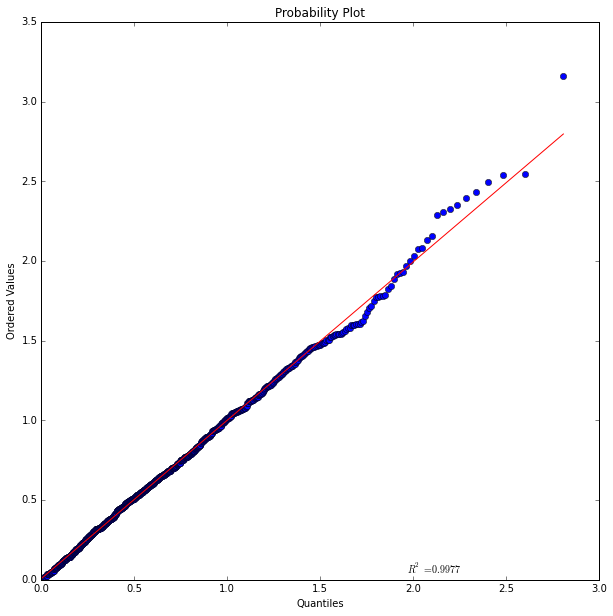

dweibull with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


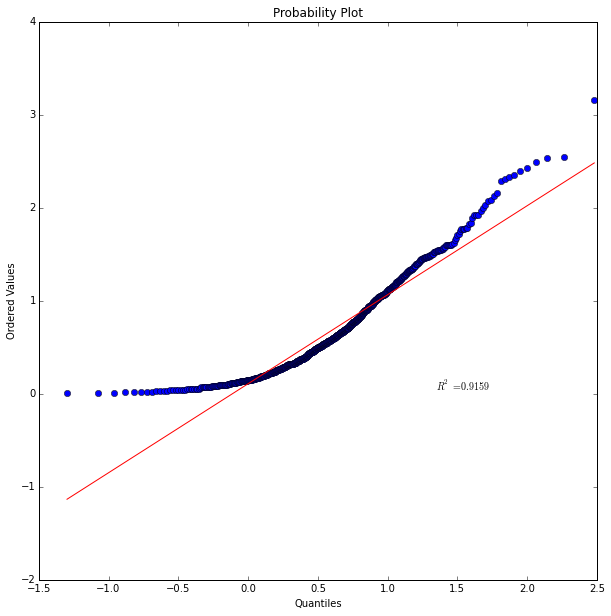

exponweib with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


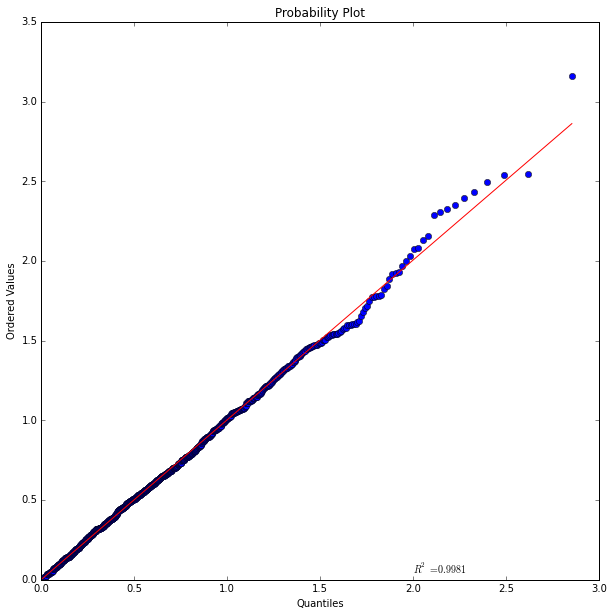

genextreme with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


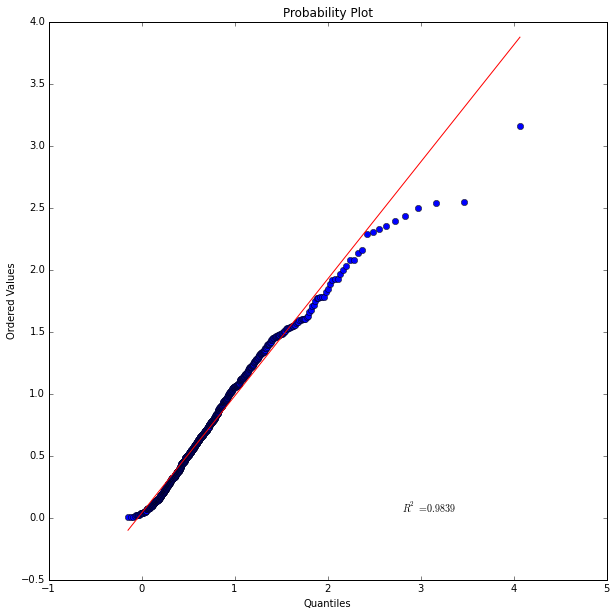

logistic with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


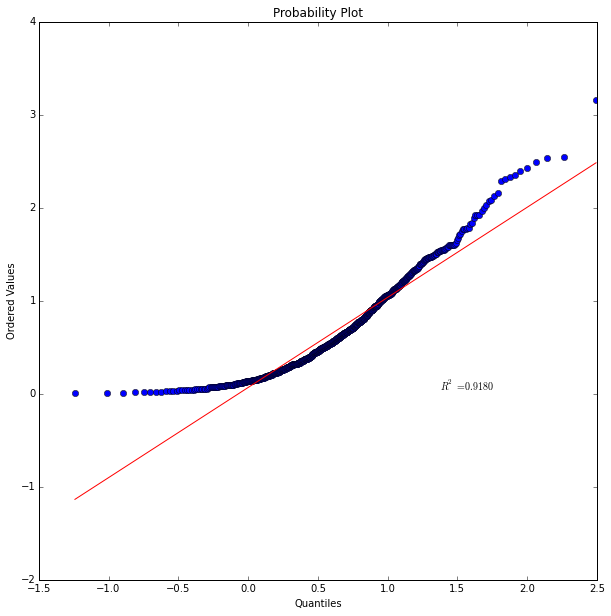

lognorm with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


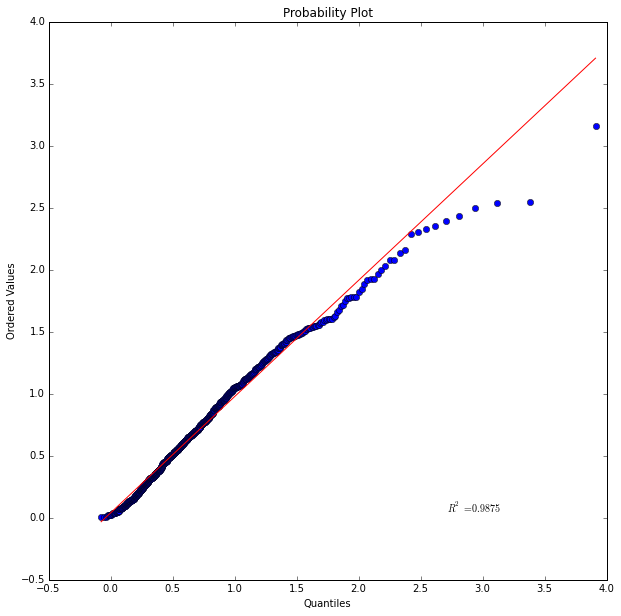

nakagami with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


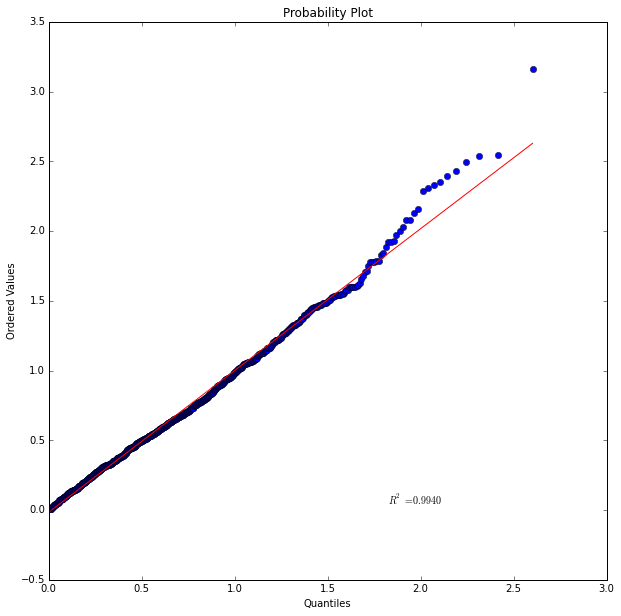

norm with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


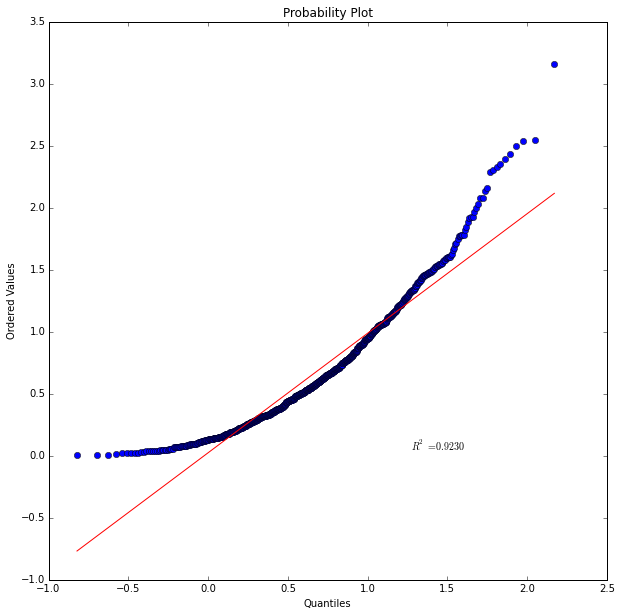

rice with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


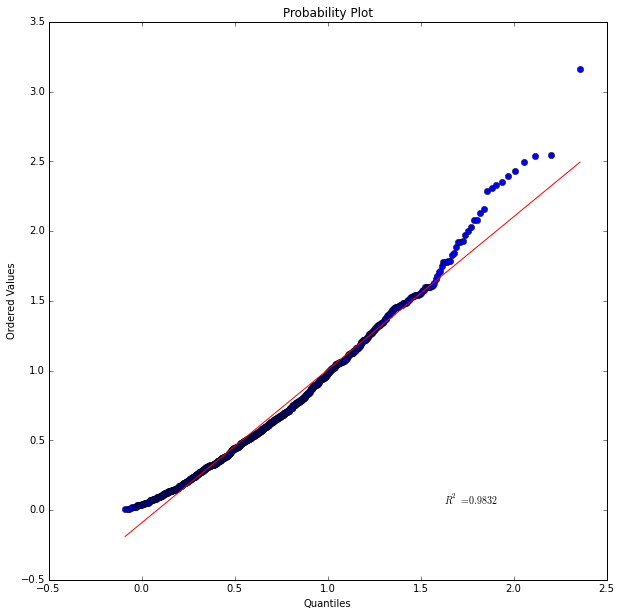

t with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


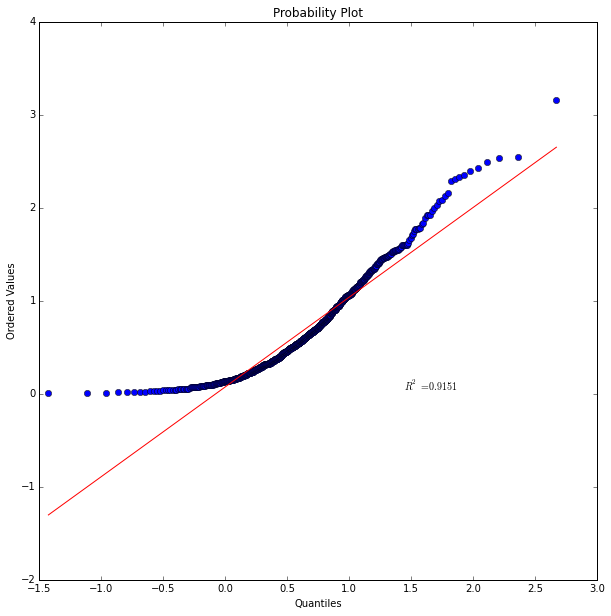

weibull_min with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


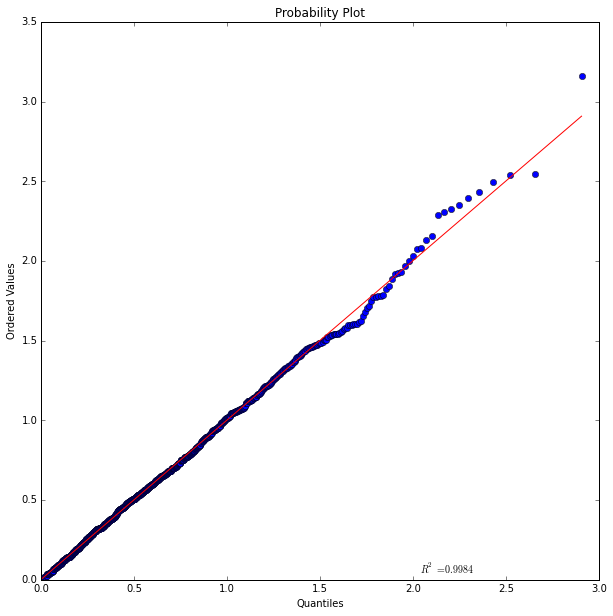

weibull_max with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


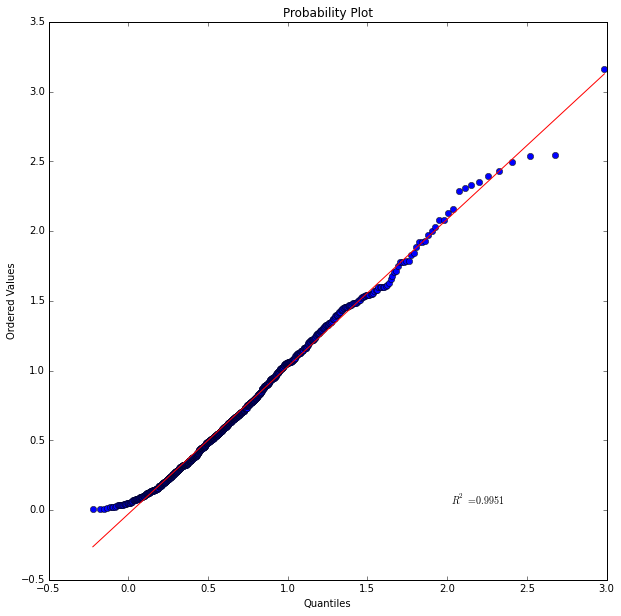

chi with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


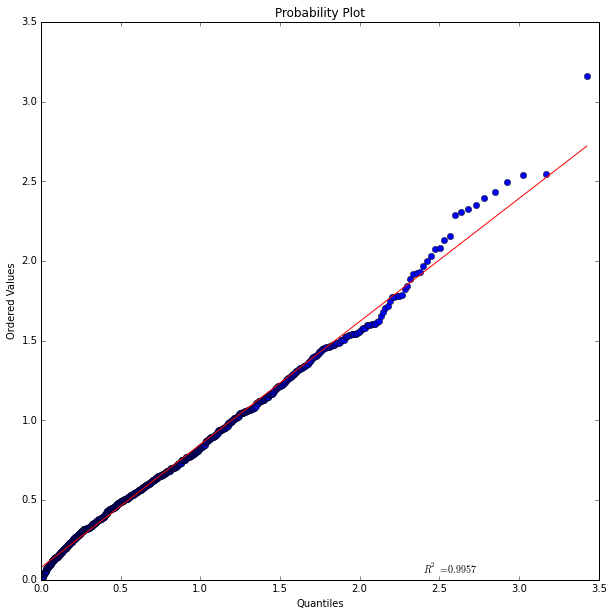

chi2 with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


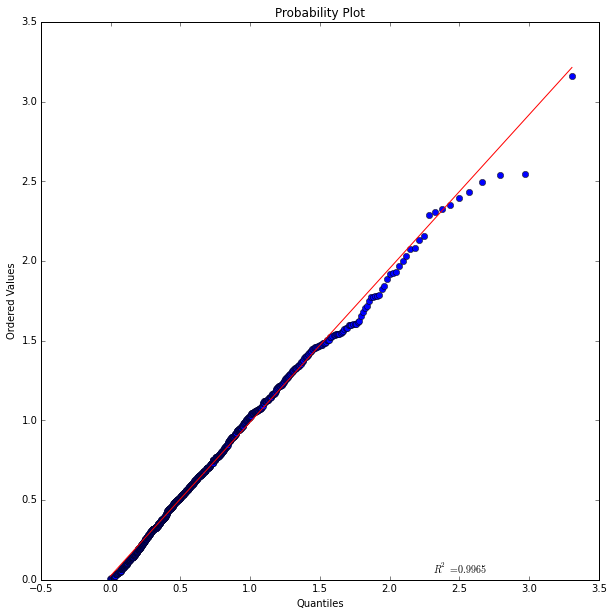

f with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


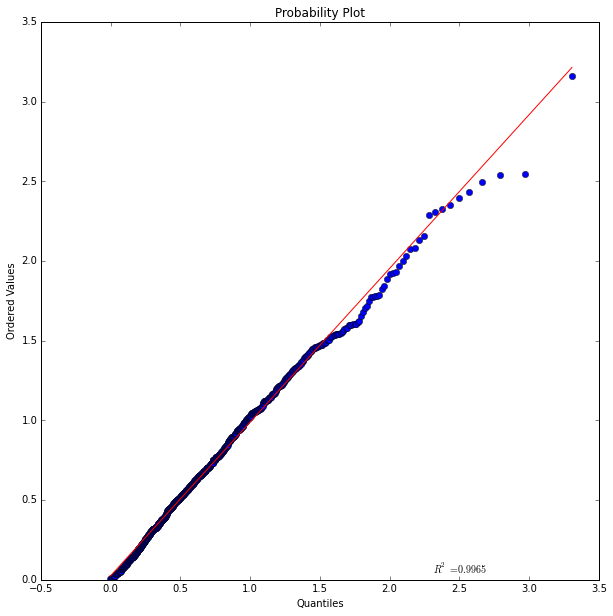

In [66]:
from scipy import stats
import matplotlib.pyplot as plt

dist_names = ['beta', 'dweibull', 'exponweib', 'genextreme', 'logistic', 'lognorm', 'nakagami', 'norm', 
              'rice', 't', 'weibull_min', 'weibull_max', 
              'chi', 'chi2','f']


for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    params = dist.fit(dataset)
    print("{} with params {}".format(dist_name, param))
    fig = plt.figure(8, figsize=(10, 10))
    ax = fig.add_subplot(111)
    res = stats.probplot(dataset, dist=dist, sparams=params, plot=ax)
    plt.show()



beta with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


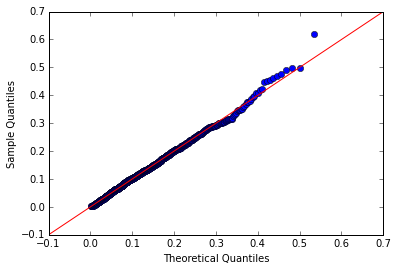

dweibull with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


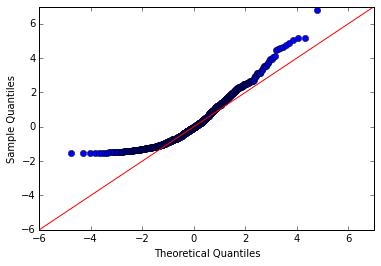

exponweib with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


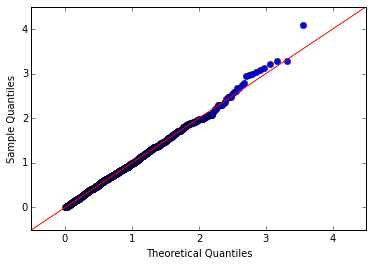

genextreme with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


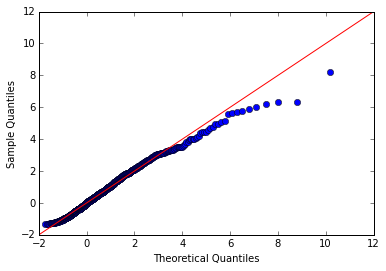

logistic with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


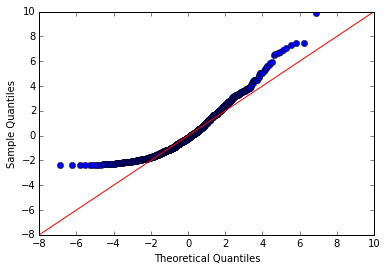

lognorm with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


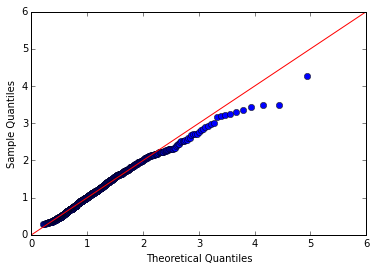

nakagami with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


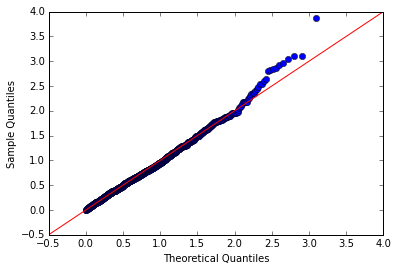

norm with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


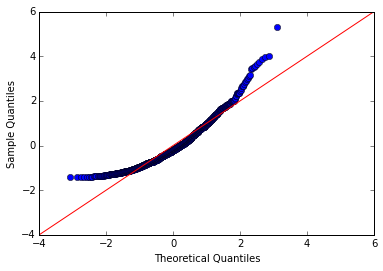

rice with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


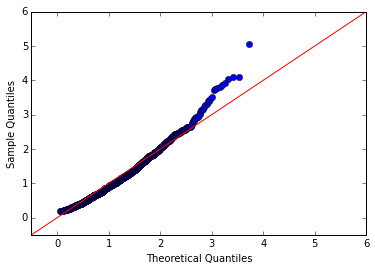

t with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


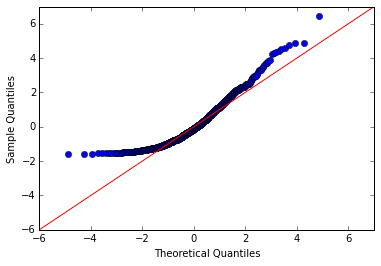

weibull_min with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


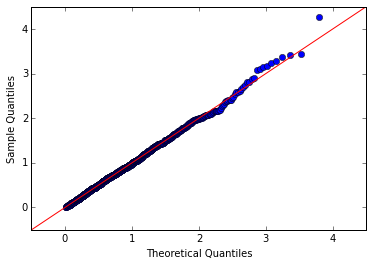

weibull_max with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


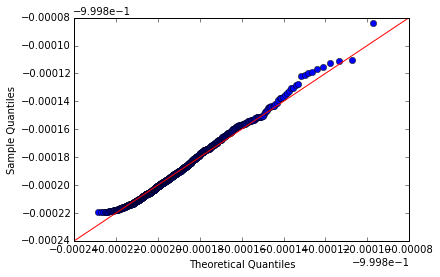

chi with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


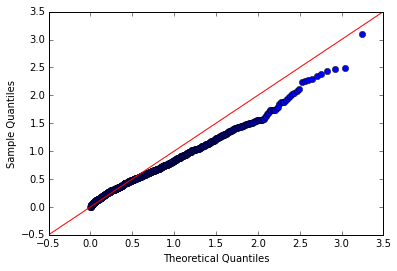

chi2 with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


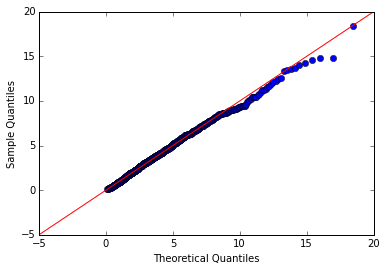

f with params (2.7601685985720099, 2396386.5859259805, 0.2, 0.56331768725424536)


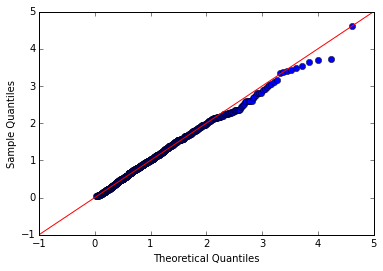

In [68]:
import statsmodels.api as sm


dist_names = ['beta', 'dweibull', 'exponweib', 'genextreme', 'logistic', 'lognorm', 'nakagami', 'norm', 
              'rice', 't', 'weibull_min', 'weibull_max', 
              'chi', 'chi2','f']


for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)   
    fig = sm.qqplot(dataset, dist, fit=True, line='45')
    print("{} with params {}".format(dist_name, param))
    plt.show()



In [96]:
# Computes the Kolmogorov-Smirnov statistic on 2 samples.

#     This is a two-sided test for the null hypothesis that 2 independent samples
#     are drawn from the same continuous distribution.

#     If the K-S statistic is small or the p-value is high, then we cannot
#     reject the hypothesis that the distributions of the two samples
#     are the same.

params = stats.beta.fit(dataset)
dist =   stats.beta.rvs(size=len(dataset),*params)
res = stats.ks_2samp(dataset, dist)
print(res)

params = stats.exponweib.fit(dataset)
dist = stats.exponweib.rvs(size=dataset.__sizeof__(),*params)
res = stats.ks_2samp(dataset, dist)
print(res)



(0.026000000000000023, 0.88396190167972111)
(0.053999999999999992, 0.97913061814959468)
